In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
import tensorflow as tf
print(tf.__version__)
import keras
print(keras.__version__)

/home/sunxin/miniconda3/envs/qinhanmin-test/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/sunxin/miniconda3/envs/qinhanmin-test/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/sunxin/miniconda3/envs/qinhanmin-test/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/sunxin/minico

1.13.2
2.2.4


Using TensorFlow backend.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import imdb
from keras import models
from keras import layers
from keras import regularizers

In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequence(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

X_train = vectorize_sequence(train_data)
X_test = vectorize_sequence(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [4]:
original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))
original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(4, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))
smaller_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])

In [6]:
original_hist = original_model.fit(X_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(X_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 6s 232us/step - loss: 0.4440 - acc: 0.8251 - val_loss: 0.3286 - val_acc: 0.8835
Epoch 2/20
25000/25000 [==============================] - 3s 109us/step - loss: 0.2573 - acc: 0.9078 - val_loss: 0.2864 - val_acc: 0.8882
Epoch 3/20
25000/25000 [==============================] - 3s 108us/step - loss: 0.1991 - acc: 0.9292 - val_loss: 0.2821 - val_acc: 0.8891
Epoch 4/20
25000/25000 [==============================] - 3s 123us/step - loss: 0.1666 - acc: 0.9412 - val_loss: 0.2939 - val_acc: 0.8844
Epoch 5/20
25000/25000 [==============================] - 3s 122us/step - loss: 0.1435 - acc: 0.9501 - val_loss: 0.3116 - val_acc: 0.8804
Epoch 6/20
25000/25000 [==============================] - 3s 127us/step - loss: 0.1257 - acc: 0.9558 - val_loss: 0.3483 - val_acc: 0.8721
Epoch 7/20
25000/25000 [==============================] - 3s 117us/step - 

In [7]:
smaller_model_hist = smaller_model.fit(X_train, y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(X_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 4s 178us/step - loss: 0.5804 - acc: 0.7027 - val_loss: 0.5309 - val_acc: 0.7558
Epoch 2/20
25000/25000 [==============================] - 4s 167us/step - loss: 0.4843 - acc: 0.8455 - val_loss: 0.4876 - val_acc: 0.8280
Epoch 3/20
25000/25000 [==============================] - 4s 167us/step - loss: 0.4389 - acc: 0.8920 - val_loss: 0.4663 - val_acc: 0.8497
Epoch 4/20
25000/25000 [==============================] - 4s 167us/step - loss: 0.4077 - acc: 0.9154 - val_loss: 0.4526 - val_acc: 0.8663
Epoch 5/20
25000/25000 [==============================] - 4s 165us/step - loss: 0.3832 - acc: 0.9306 - val_loss: 0.4513 - val_acc: 0.8620
Epoch 6/20
25000/25000 [==============================] - 4s 166us/step - loss: 0.3620 - acc: 0.9415 - val_loss: 0.4424 - val_acc: 0.8728
Epoch 7/20
25000/25000 [==============================] - 4s 165us/step - loss: 0.3425 - acc: 0.9515 - val_loss: 0.4489 - 

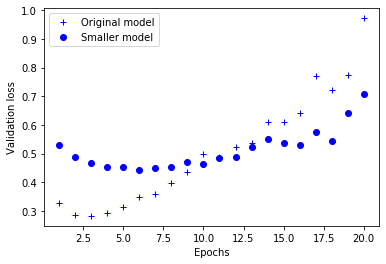

In [8]:
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']
plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()
plt.show()

In [9]:
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
bigger_model.add(layers.Dense(512, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))
bigger_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['acc'])

In [10]:
bigger_model_hist = bigger_model.fit(X_train, y_train,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(X_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 4s 158us/step - loss: 0.4635 - acc: 0.7944 - val_loss: 0.2871 - val_acc: 0.8887
Epoch 2/20
25000/25000 [==============================] - 4s 142us/step - loss: 0.2232 - acc: 0.9132 - val_loss: 0.3263 - val_acc: 0.8646
Epoch 3/20
25000/25000 [==============================] - 4s 142us/step - loss: 0.1368 - acc: 0.9498 - val_loss: 0.3135 - val_acc: 0.8829
Epoch 4/20
25000/25000 [==============================] - 4s 143us/step - loss: 0.0769 - acc: 0.9787 - val_loss: 0.4173 - val_acc: 0.8830
Epoch 5/20
25000/25000 [==============================] - 4s 141us/step - loss: 0.0720 - acc: 0.9864 - val_loss: 0.4944 - val_acc: 0.8828
Epoch 6/20
25000/25000 [==============================] - 4s 142us/step - loss: 0.0717 - acc: 0.9887 - val_loss: 0.4790 - val_acc: 0.8792
Epoch 7/20
25000/25000 [==============================] - 4s 144us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.6488 - 

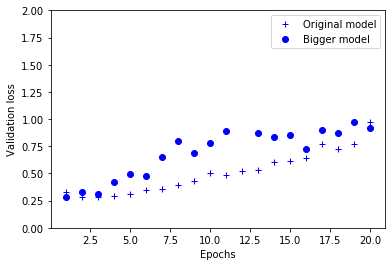

In [21]:
bigger_model_val_loss = bigger_model_hist.history['val_loss']
plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()
plt.show()

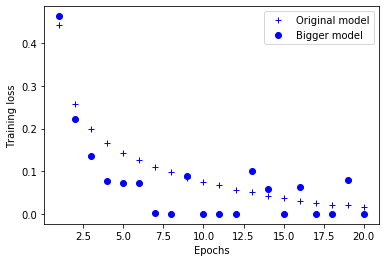

In [12]:
original_train_loss = original_hist.history['loss']
bigger_model_train_loss = bigger_model_hist.history['loss']
plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_train_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()
plt.show()

In [13]:
# regularization
l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

In [14]:
l2_model_hist = l2_model.fit(X_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(X_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 4s 149us/step - loss: 0.4879 - acc: 0.8152 - val_loss: 0.3895 - val_acc: 0.8656
Epoch 2/20
25000/25000 [==============================] - 3s 138us/step - loss: 0.3100 - acc: 0.9061 - val_loss: 0.3306 - val_acc: 0.8891
Epoch 3/20
25000/25000 [==============================] - 3s 138us/step - loss: 0.2657 - acc: 0.9202 - val_loss: 0.3301 - val_acc: 0.8872
Epoch 4/20
25000/25000 [==============================] - 3s 136us/step - loss: 0.2459 - acc: 0.9286 - val_loss: 0.3413 - val_acc: 0.8821
Epoch 5/20
25000/25000 [==============================] - 3s 139us/step - loss: 0.2323 - acc: 0.9352 - val_loss: 0.3818 - val_acc: 0.8685
Epoch 6/20
25000/25000 [==============================] - 3s 139us/step - loss: 0.2237 - acc: 0.9390 - val_loss: 0.3676 - val_acc: 0.8752
Epoch 7/20
25000/25000 [==============================] - 3s 138us/step - loss: 0.2173 - acc: 0.9409 - val_loss: 0.3748 - 

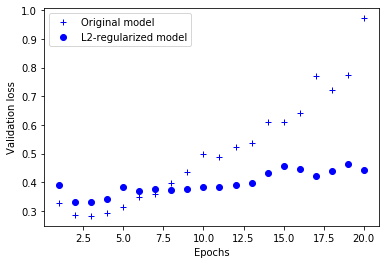

In [15]:
l2_model_val_loss = l2_model_hist.history['val_loss']
plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()
plt.show()

In [16]:
# dropout
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))
dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [17]:
dpt_model_hist = dpt_model.fit(X_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(X_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 4s 151us/step - loss: 0.5906 - acc: 0.6839 - val_loss: 0.4324 - val_acc: 0.8620
Epoch 2/20
25000/25000 [==============================] - 4s 140us/step - loss: 0.4359 - acc: 0.8186 - val_loss: 0.3475 - val_acc: 0.8706
Epoch 3/20
25000/25000 [==============================] - 3s 138us/step - loss: 0.3469 - acc: 0.8714 - val_loss: 0.2912 - val_acc: 0.8872
Epoch 4/20
25000/25000 [==============================] - 3s 139us/step - loss: 0.2881 - acc: 0.8983 - val_loss: 0.2765 - val_acc: 0.8884
Epoch 5/20
25000/25000 [==============================] - 3s 139us/step - loss: 0.2531 - acc: 0.9136 - val_loss: 0.2802 - val_acc: 0.8884
Epoch 6/20
25000/25000 [==============================] - 4s 141us/step - loss: 0.2218 - acc: 0.9266 - val_loss: 0.2886 - val_acc: 0.8874
Epoch 7/20
25000/25000 [==============================] - 3s 136us/step - loss: 0.1967 - acc: 0.9356 - val_loss: 0.3197 - 

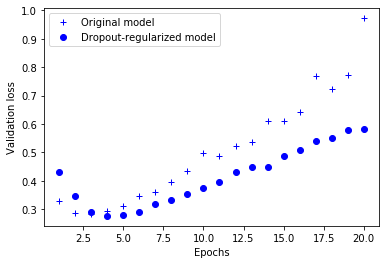

In [18]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']
plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()
plt.show()